In [40]:
def plot_tree():
    import pandas as pd
    import numpy as np
    from optbinning import BinningProcess
    df= pd.read_csv("Data_modelo.csv", sep=",",encoding="utf-8",low_memory=False)
    df['NO PAGO'] = df['DIAS_VENCIDO'] > 0
    feature_list = [
        'UBICACIO_CLIENTE', 'MONTO', 'CUOTAS_PACTADAS', 'CUOTAS_PENDIENTES'
        # , 'CALIFICACION_CIERRE'
        , 'SALDO_OBLIGACION', 'TIPO_CREDITO'
        , 'TASA_NOM_ANUAL', 'GENERO', 'EDAD', 'NIVEL_DE_ESTUDIOS_NEW'
       ]
    target = 'NO PAGO'
    binning_process = BinningProcess(variable_names=feature_list)
    binning_process.fit(df[feature_list], df[target])
    binning_process.summary()
    
    dict_ordered = dict()
    for variable in feature_list:
        optb = binning_process.get_binned_variable(name=variable)
        if optb.dtype == 'categorical':
            a = []
            for bins in optb.splits:
                for value in bins:
                    a.append(value)
            dict_ordered[variable] = a
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV

    target_df = df[target]
    df = df[feature_list]
    df[target] = target_df

    for variable in feature_list:
        if df.dtypes[variable] == 'O':
            transform_dict = dict()
            for i in range(len(dict_ordered.get(variable))):
                transform_dict[dict_ordered.get(variable)[i]] = i
            df[variable] = df[variable].apply(lambda a : transform_dict.get(str(a)))
            print(variable)
            for i in range(len(dict_ordered.get(variable))):
                print(dict_ordered.get(variable)[i] + ', ' + str(i))

    base_def=df[df[target].isna()==False].fillna(0)
    
    X = base_def[feature_list].fillna(0)
    y = base_def[target].fillna(0)
    model = DecisionTreeClassifier(class_weight='balanced')

    pipe = Pipeline(steps=[('dec_tree', model)])
    min_samples_leaf = [0.02,0.03,0.04,0.05,0.06,0.1]
    max_depth = [4,6,8,10,12]
    parameters = dict(dec_tree__min_samples_leaf=min_samples_leaf,
                        dec_tree__max_depth=max_depth)
    clf_GS = GridSearchCV(pipe, parameters)
    clf_GS.fit(X, y)

    model = DecisionTreeClassifier(max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth'],
                                    min_samples_leaf=clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'],
                                    class_weight='balanced')
    model.fit(X, y)
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(40,20))
    return tree.plot_tree(model, feature_names=feature_list, fontsize=12,proportion=True, filled=True)


UBICACIO_CLIENTE
RURAL, 0
URBANA, 1
TIPO_CREDITO
SIN_PERFIL, 0
PARALELO, 1
RENOVADO, 2
SIN PERFIL, 3
RETANQUEADO, 4
NUEVO, 5
GENERO
Femenino , 0
Masculino , 1
NIVEL_DE_ESTUDIOS_NEW
Desconocido, 0
Ninguno, 1
Basica, 2
Superior, 3
Media, 4


[Text(0.56, 0.9, 'SALDO_OBLIGACION <= 2497950.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.32, 0.7, 'EDAD <= 36.5\ngini = 0.497\nsamples = 58.0%\nvalue = [0.459, 0.541]'),
 Text(0.16, 0.5, 'SALDO_OBLIGACION <= 741134.5\ngini = 0.477\nsamples = 16.5%\nvalue = [0.393, 0.607]'),
 Text(0.08, 0.3, 'MONTO <= 1365000.0\ngini = 0.431\nsamples = 4.4%\nvalue = [0.315, 0.685]'),
 Text(0.04, 0.1, 'gini = 0.447\nsamples = 2.3%\nvalue = [0.337, 0.663]'),
 Text(0.12, 0.1, 'gini = 0.413\nsamples = 2.1%\nvalue = [0.291, 0.709]'),
 Text(0.24, 0.3, 'CUOTAS_PACTADAS <= 12.5\ngini = 0.489\nsamples = 12.1%\nvalue = [0.427, 0.573]'),
 Text(0.2, 0.1, 'gini = 0.5\nsamples = 6.0%\nvalue = [0.499, 0.501]'),
 Text(0.28, 0.1, 'gini = 0.464\nsamples = 6.1%\nvalue = [0.366, 0.634]'),
 Text(0.48, 0.5, 'MONTO <= 2245000.0\ngini = 0.5\nsamples = 41.4%\nvalue = [0.488, 0.512]'),
 Text(0.4, 0.3, 'SALDO_OBLIGACION <= 743362.5\ngini = 0.497\nsamples = 22.3%\nvalue = [0.541, 0.459]'),
 Text(0.36, 0.1, 'gin

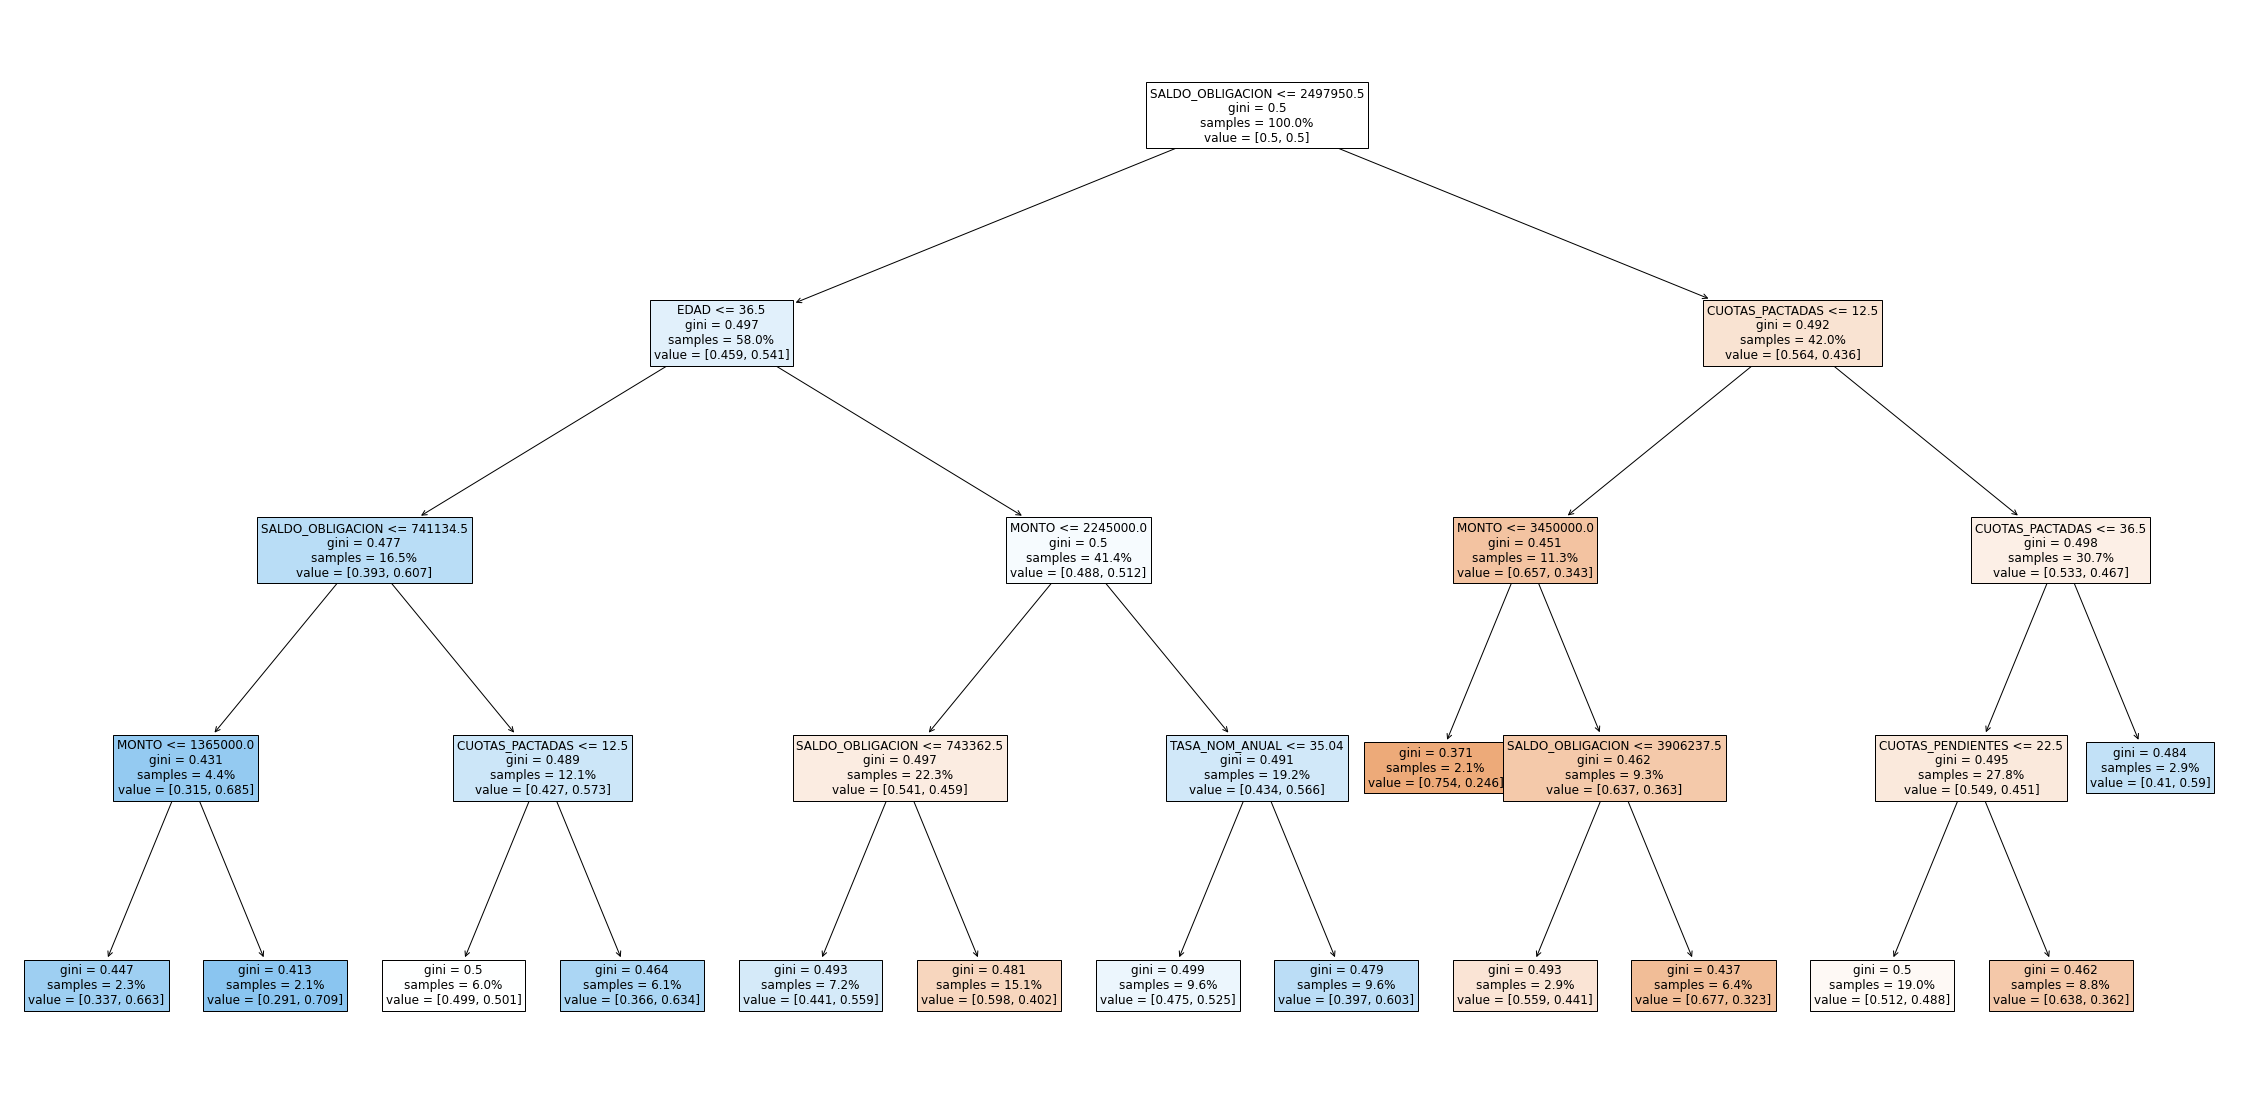

In [19]:
plot_tree()